In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('Social_Network_Ads.csv')

In [64]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [65]:
df = df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [66]:
df.sample(5)

,Age,EstimatedSalary,Purchased
385,56,60000,1
364,42,104000,1
115,40,57000,0
139,19,25000,0
93,29,28000,0


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'], test_size=0.3, random_state=0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)


x_train_scaled = scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)



In [69]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [70]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [71]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [72]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [73]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [74]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of scaling

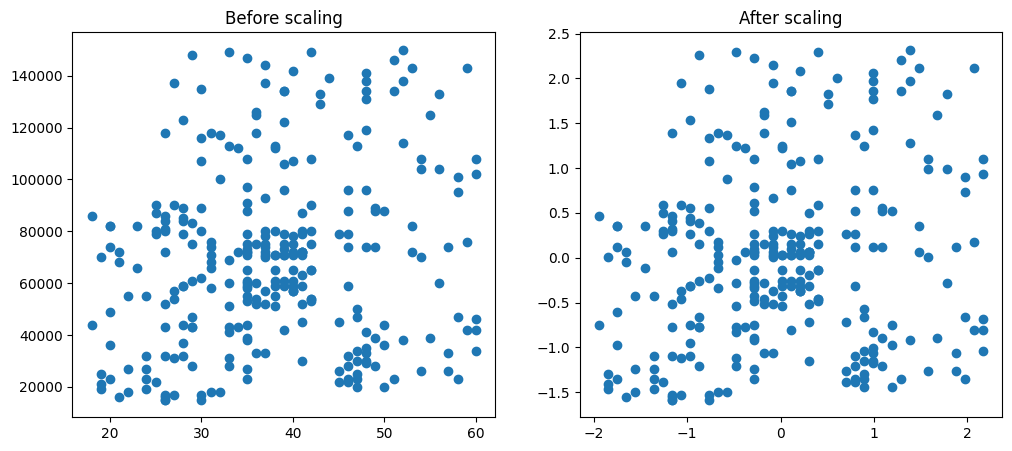

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize=(12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before scaling')

ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax2.set_title('After scaling')

plt.show()

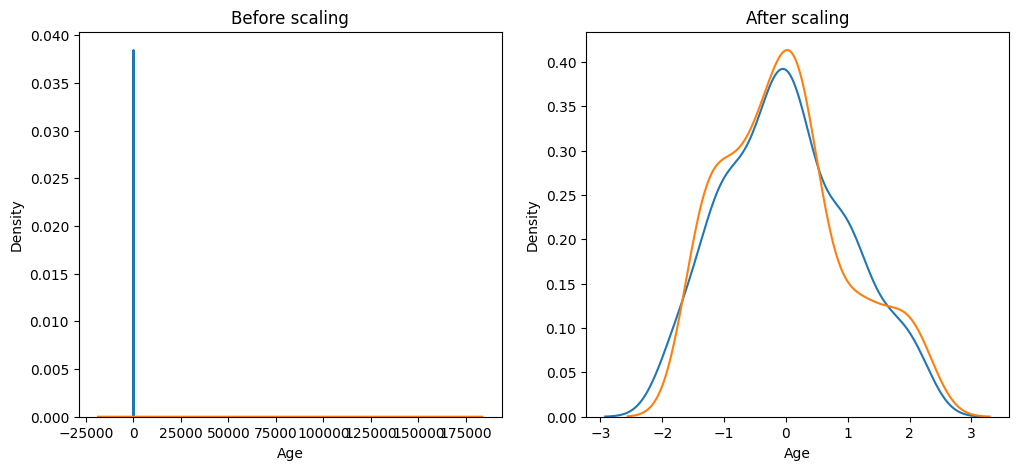

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize=(12,5))

sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1) 
ax1.set_title('Before scaling')


sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_title('After scaling')

plt.show()

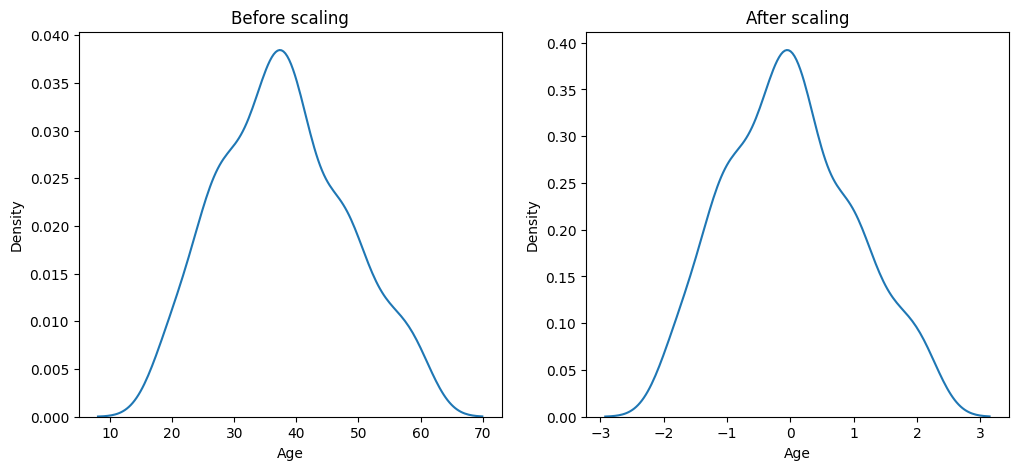

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize=(12,5))

sns.kdeplot(x_train['Age'], ax=ax1)
ax1.set_title('Before scaling')


sns.kdeplot(x_train_scaled['Age'], ax=ax2)
ax2.set_title('After scaling')

plt.show()

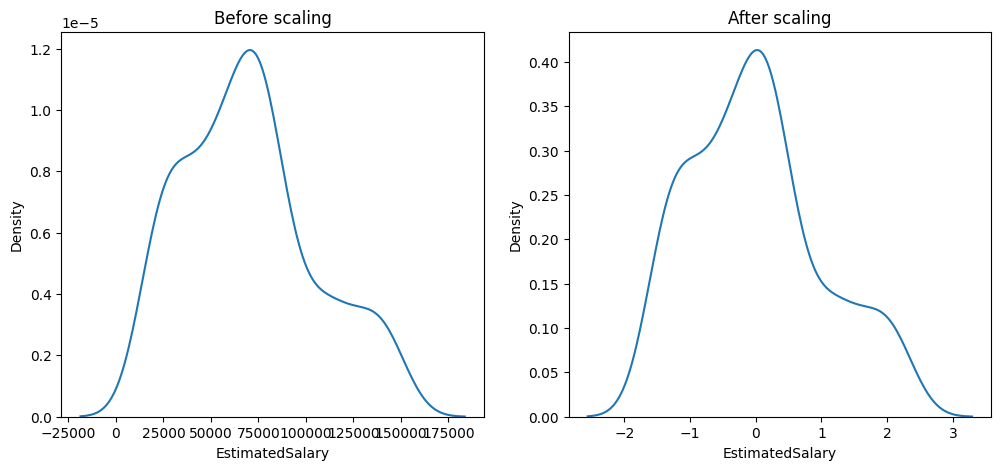

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols =2, figsize=(12,5))

sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)
ax1.set_title('Before scaling')


sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_title('After scaling')

plt.show()

# Why it is important to standardize the data?

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [81]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [82]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [83]:
from sklearn.metrics import accuracy_score
print(" Actual:", accuracy_score(y_test, y_pred))
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))

 Actual: 0.875
Accuracy with scaling: 0.8666666666666667


In [84]:
print("Length of y_test:", len(y_test))
print("Length of y_pred_scaled:", len(y_pred_scaled))

Length of y_test: 120
Length of y_pred_scaled: 120


In [85]:
from sklearn.metrics import accuracy_score
print(" Actual:", accuracy_score(y_test, y_pred))
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))

 Actual: 0.875
Accuracy with scaling: 0.8666666666666667


In [86]:

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [87]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [88]:
y_pred = dt.predict(x_test) 
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [89]:
print(" Actual:", accuracy_score(y_test, y_pred))
print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))

 Actual: 0.875
Accuracy with scaling: 0.875


In [90]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [93]:
#Apply Standardization when using algorithms compute distances between point

#1. KMeans
#2. K-Nearest Neighbors (KNN)
#3.Principal Component Analysis (PCA)
#4.Artificial Neural Networks (ANNs)
#5.Gradient Descent based algorithms

